<a href="https://colab.research.google.com/github/manasa0551/Technocolabs-Softwares-Mini-Project/blob/BigMartSales-Prediction/BigMartSalesPrediction_MiniProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Problem Statement:**
To find what item play an important role and how they effect the sales by studying the BigMart sales data and to build a predictive model to find key factore that can increase their sales. 

2. **Hypothesis Generation:** It is a technique which helps to analyze the validity of the claims whether the claims(occurance of the events are true).
--whether the results returned by performance metrics of ml models are representative of the models or they happened by chance.
--It helps in exploring the data more efficiently and effectively.

--These are some of the hypothesis based on the problem statement:

a.Location of the store effect the sales.

b.Higher sales during weekends

c.Higher sales during Festive time

d.Higher sales at promotion event

e.Higher sales during morning or late evening



3. **Loading Packages and Data**

In [1]:
# Importing Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Add an indicator column while concatenating the two dataframes, so you can later seperate them again:
testdata = pd.read_csv('Test.csv')
traindata = pd.read_csv('Train.csv')

In [3]:
traindata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


4. **Data Exploration**(EDA)

In [4]:
# studying number of data points and features
traindata.shape

(8523, 12)

In [5]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


 Checking for Distribution of Target Variable : Item_outlet_sales

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

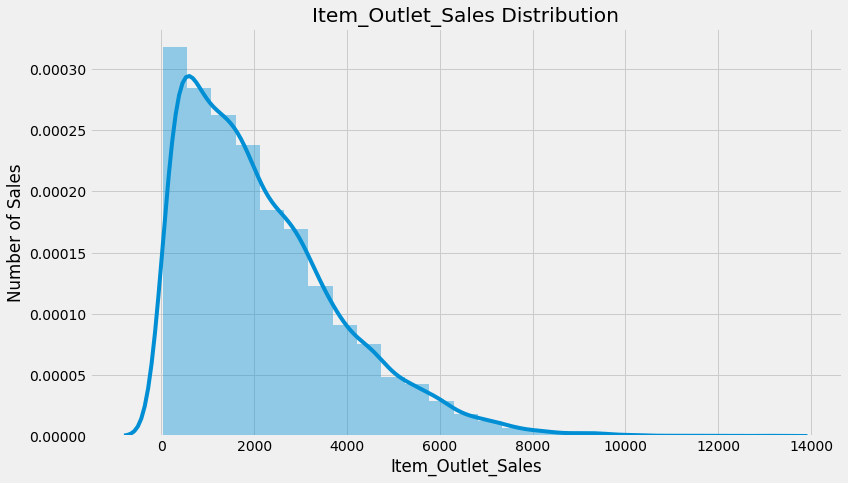

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(traindata.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [7]:
# checking for Skewness and Kurtosis
print ("Skew is:", traindata.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % traindata.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542796
Kurtosis: 1.615877


# Split features into Numerical and Categorical

In [8]:
# separateing numerical and categorical features

cate_features = traindata.select_dtypes(include = "object")
num_features = traindata.select_dtypes(include = "number")

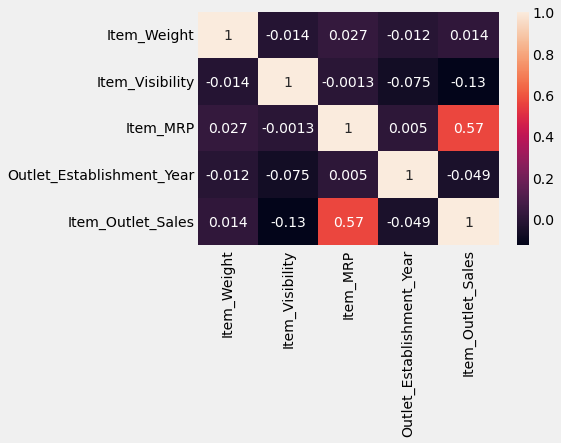

In [9]:
traindata_num=num_features.corr()
sns.heatmap(traindata_num ,annot =True)

Categorical Variables

In [10]:
cate_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Item_Identifier       8523 non-null   object
 1   Item_Fat_Content      8523 non-null   object
 2   Item_Type             8523 non-null   object
 3   Outlet_Identifier     8523 non-null   object
 4   Outlet_Size           6113 non-null   object
 5   Outlet_Location_Type  8523 non-null   object
 6   Outlet_Type           8523 non-null   object
dtypes: object(7)
memory usage: 466.2+ KB


6.Univariate Analysis

In [11]:
# 1. checking for distribution of the Item_Fat_Content
cate_features.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

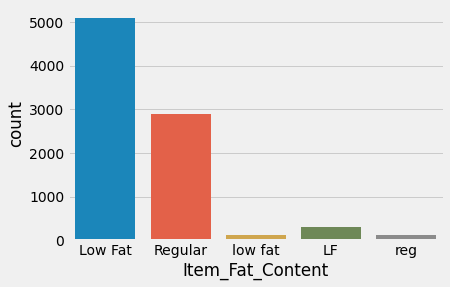

In [12]:
sns.countplot(cate_features.Item_Fat_Content)

In [13]:
#2. checking for distribution of the Item_Type
cate_features.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

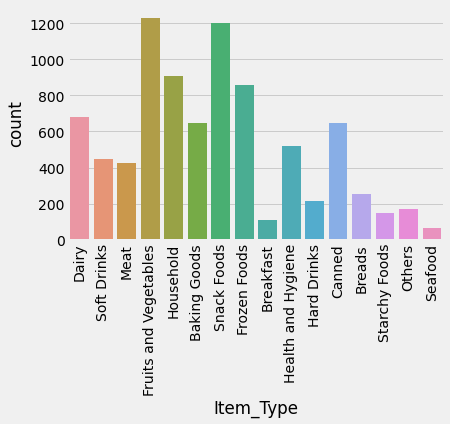

In [14]:
sns.countplot(cate_features.Item_Type)
plt.xticks(rotation=90)

In [15]:
#3. checking for distribution of the Outlet_Size
cate_features.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

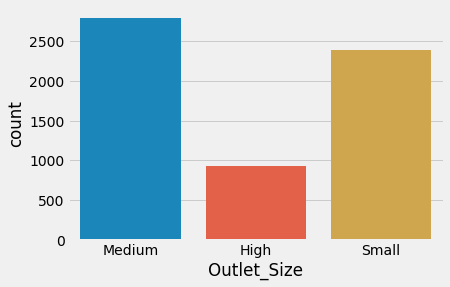

In [16]:
sns.countplot(cate_features.Outlet_Size)

In [17]:
#4. checking for distribution of the Outlet_Location_Type
cate_features.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

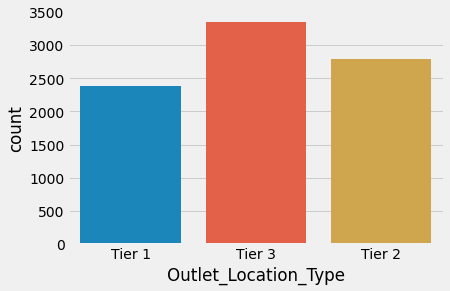

In [18]:
sns.countplot(cate_features.Outlet_Location_Type)

In [19]:
#5. checking for distribution of the Outlet_Type
cate_features.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

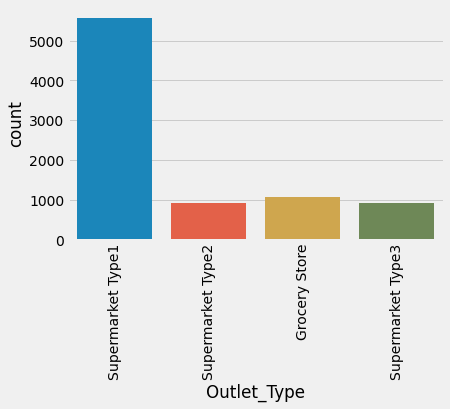

In [20]:
sns.countplot(traindata.Outlet_Type)
plt.xticks(rotation=90)

7. Bivariate Analysis

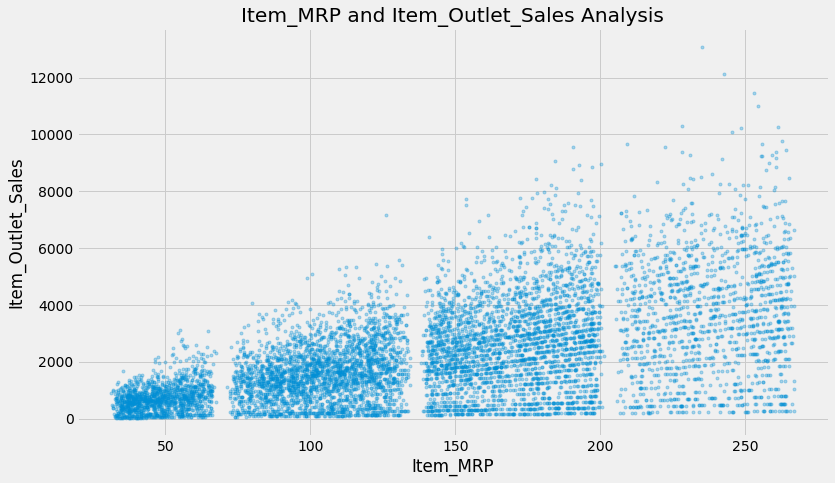

In [21]:
# checking for features which are related to Outlet_Sales
       # Item_MRP VS Item_Outlet_Sales
plt.figure(figsize=(12,7))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_MRP and Item_Outlet_Sales Analysis")
plt.plot(num_features.Item_MRP, num_features["Item_Outlet_Sales"],'.', alpha = 0.3)

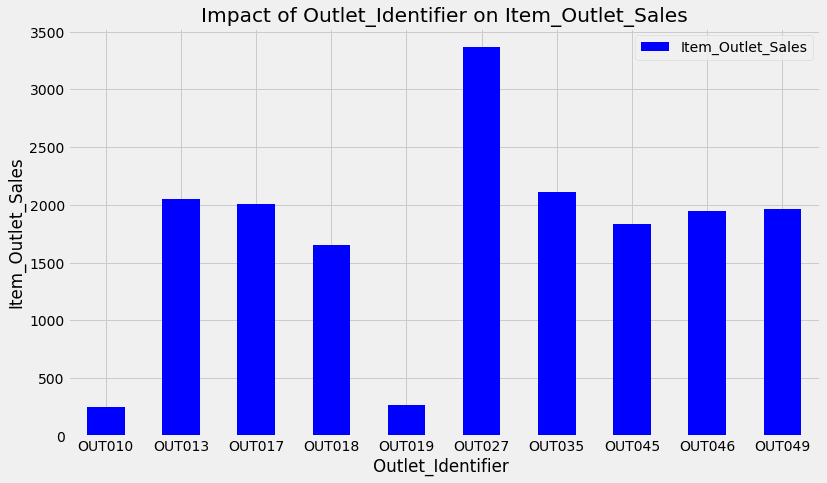

In [22]:
# Impact of Outlet_Identifier on Item_Outlet_Sales
Outlet_Identifier_pivot = \
traindata.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Identifier ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [23]:
traindata.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


---outlet 27 of Supermarket Type3 has highest sales

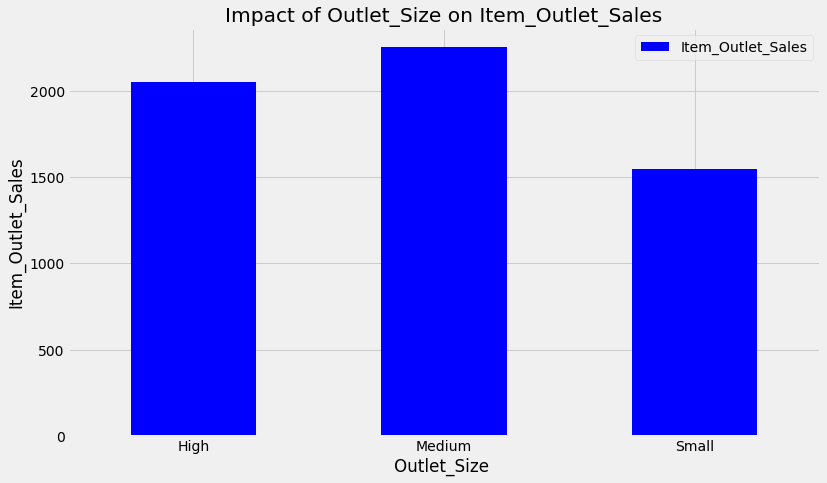

In [24]:
# Checking for Outlet_Size impact on Item_Outlet_Sales
Outlet_Size_pivot = \
traindata.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Size ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

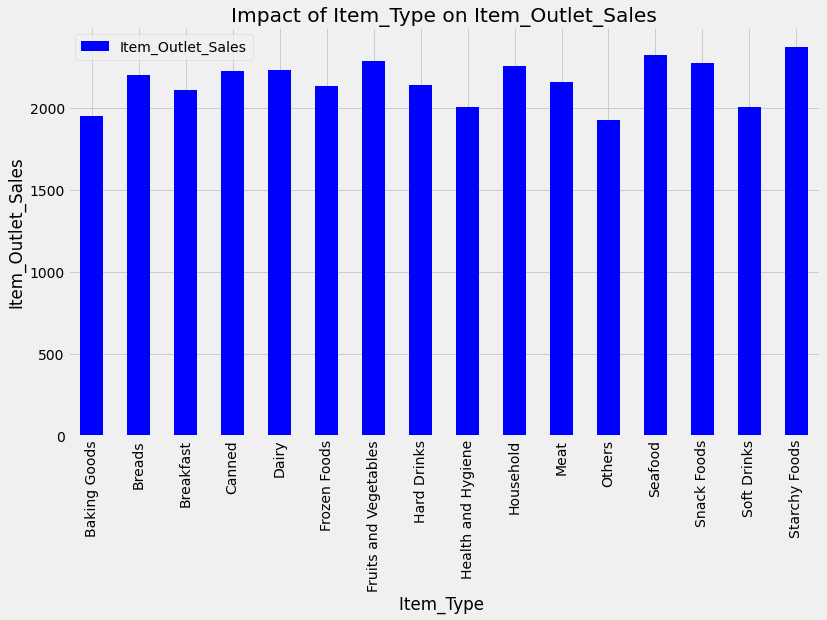

In [25]:
# checking for impact of Item_Type Vs Item_Outlet_Sales
pivoTable = \
traindata.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

8. Missing Value Treatment

In [26]:
# concatinating Train and Test data sets
big_mart_data= pd.concat([traindata, testdata], ignore_index=True)

In [27]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [28]:
# checking for unique values of each column
big_mart_data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

 **Imputing Missing Values**

In [29]:
big_mart_data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [30]:
# mean value of "Item_weight" column
print(big_mart_data['Item_Weight'].mean())
print(big_mart_data['Outlet_Size'].mode())
print(big_mart_data['Item_Outlet_Sales'].mean())

12.792854228644284
0    Medium
dtype: object
2181.288913575032


In [31]:
# Filling the missing values in "Item_weight" column with mean value
big_mart_data['Item_Weight']=big_mart_data['Item_Weight'].fillna(12.79)
big_mart_data['Outlet_Size']=big_mart_data['Outlet_Size'].fillna('Medium')
big_mart_data['Item_Outlet_Sales']=big_mart_data['Item_Outlet_Sales'].fillna(2181)

#big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)

In [32]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Checking for Duplicates

In [33]:
# check for duplicate data
duplicate= big_mart_data.duplicated()
print(duplicate.sum())
big_mart_data[duplicate]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


# Outliers Detection

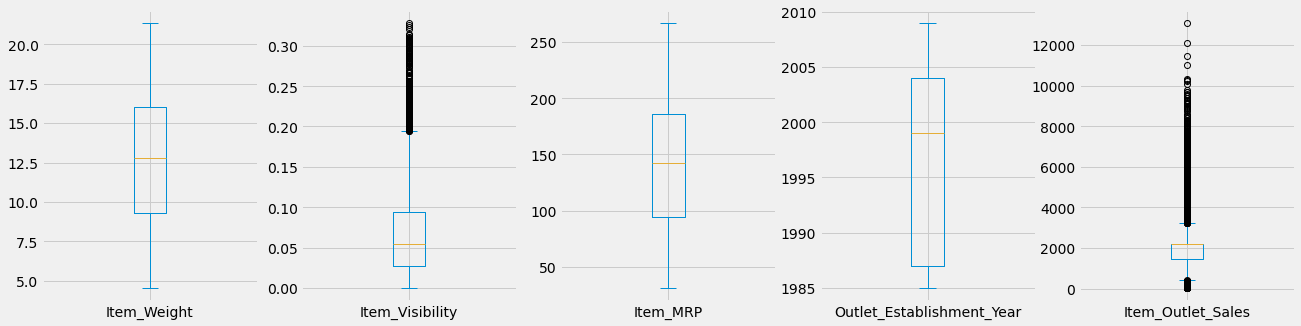

In [34]:
# outlier visualization by using Boxplots 
big_mart_data.plot(kind='box',subplots=True ,  figsize=(20,5));


Item_Visibity and Item_outlet_sales have outliers.

In [35]:
big_mart_data.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792364,0.065953,141.004977,1997.830681,2181.173360
std,4.234226,0.051459,62.086938,8.371664,1321.864437
min,4.555000,0.000000,31.290000,1985.000000,33.290000
1%,5.175000,0.000000,35.284878,1985.000000,107.879574
5%,6.115000,0.000000,42.877000,1985.000000,291.620400
10%,6.920000,0.011797,53.230580,1985.000000,559.272000
25%,9.300000,0.027036,94.012000,1987.000000,1468.089000
50%,12.790000,0.054021,142.247000,1999.000000,2181.000000
75%,16.000000,0.094037,185.855600,2004.000000,2181.000000


Capping and Flooring of outliers

In [36]:
def outlier_cap(x):
  x = x.clip(lower = x.quantile(0.01))
  x = x.clip(upper = x.quantile(0.99))
  return(x)

In [37]:
big_mart_data = num_features.apply(lambda x : outlier_cap(x))

In [38]:
big_mart_data.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857891,0.065712,140.991167,1997.831867,2170.021590
std,4.633198,0.050023,62.224557,8.371760,1663.002754
min,5.150000,0.000000,35.062752,1985.000000,83.890800
1%,5.150000,0.000000,35.068175,1985.000000,83.890800
5%,5.945000,0.000000,42.516700,1985.000000,188.421400
10%,6.695000,0.012042,52.795600,1985.000000,343.552800
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400


10. Encoding Categorical Variables

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

big_mart_data['Item_Identifier'] = encoder.fit_transform(cate_features['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(cate_features['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(cate_features['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(cate_features['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(cate_features['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(cate_features['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(cate_features['Outlet_Type'])

In [40]:

big_mart_data = big_mart_data[np.isfinite(big_mart_data).all(1)]


11.  Feature Selection

In [41]:
# Removing features with 0 variance

from sklearn.feature_selection import VarianceThreshold
varselector=VarianceThreshold(threshold=0)
varselector.fit(big_mart_data)
print("Earlier shape of data: ",big_mart_data.shape)
print("shape after transformation: ",varselector.transform(big_mart_data).shape)

Earlier shape of data:  (7060, 12)
shape after transformation:  (7060, 12)


13. preprocessing Data

In [42]:
# Splitting Features and Target
X = big_mart_data.drop(columns = 'Item_Outlet_Sales', axis=1 )
Y= big_mart_data['Item_Outlet_Sales']

In [43]:
X.shape , Y.shape


((7060, 11), (7060,))

In [44]:
# Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12,)

In [45]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  


**MODEL PREPARATION**

1.Linear Regression

In [46]:
# instantiating a Linear Regression Object
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# fit the model using training data
lin_reg.fit(X_train, Y_train)
# use model to make predictions on test data
Y_pred_LN = lin_reg.predict(X_test) 


In [47]:
train_data_prediction_LN = lin_reg.predict(X_train)
r2_train_LN = metrics.r2_score(Y_train, train_data_prediction_LN)
print('R Squared value of Training Data = ', r2_train_LN)
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_LN)))

R Squared value of Training Data =  0.46263143273589324
RMSE: 1082.6752103420756


In [48]:
from sklearn import metrics

test_data_prediction_LN = lin_reg.predict(X_test)
r2_test_LN = metrics.r2_score(Y_test, test_data_prediction_LN)
print('R Squared value of Test Data = ', r2_test_LN)
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_LN)))


R Squared value of Test Data =  0.47259438053959013
RMSE: 1082.6752103420756


2. Ridge Regularization

In [49]:
from sklearn.linear_model import Ridge
model = Ridge(max_iter=10e5) 
model.fit( X_train, Y_train) 

Ridge(max_iter=1000000.0)

In [50]:
# Prediction on test set
Y_pred_RR = model.predict( X_test )    
print( "Predicted values ", np.round( Y_pred_RR[:3], 2 ) )     
# R squared Value
print("R2 score", metrics.r2_score(Y_test, Y_pred_RR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_RR)))


Predicted values  [1541.67 2228.7  3939.35]
R2 score 0.4725810971387995
RMSE: 1082.688844552312


3. Lasso Regularization

In [51]:
from sklearn.linear_model import Lasso
model = Lasso(max_iter=10e5) 
model.fit( X_train, Y_train) 

Lasso(max_iter=1000000.0)

In [52]:
# Prediction on test set
Y_pred_LR = model.predict( X_test )    
print( "Predicted values ", np.round( Y_pred_LR[:3], 2 ) )     
# R squared Value
print("R2 score", metrics.r2_score(Y_test, Y_pred_LR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_LR)))

Predicted values  [1531.69 2237.32 3928.13]
R2 score 0.47214959378675936
RMSE: 1083.131650400316


4. Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(n_estimators = 10, random_state = 5)
regressor_RF.fit(X_train, Y_train) 

RandomForestRegressor(n_estimators=10, random_state=5)

In [77]:
# Prediction on test set
Y_pred_RF = regressor_RF.predict( X_test )    
print( "Predicted values ", np.round( Y_pred_LR[:3], 2 ) )    

Predicted values  [1531.69 2237.32 3928.13]


In [78]:
train_data_prediction_RF = regressor_RF.predict(X_train)
r2_train_RF = metrics.r2_score(Y_train, train_data_prediction_RF)
print('R Squared value of Training Data = ', r2_train_RF)
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_RF)))

R Squared value of Training Data =  0.8994705216925694
RMSE: 1100.966519693672


In [79]:
test_data_prediction_RF = regressor_RF.predict(X_test)
r2_test_RF = metrics.r2_score(Y_test, test_data_prediction_RF)
print('R Squared value of Test Data = ', r2_test_RF)
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_RF)))

R Squared value of Test Data =  0.4546232852546983
RMSE: 1100.966519693672


5. XGBOOST Regressor

In [60]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)


[14:35:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [61]:
# Prediction on test set
Y_pred_XG = regressor.predict( X_test )    
print( "Predicted values ", np.round( Y_pred_LR[:3], 2 ) )    

Predicted values  [1531.69 2237.32 3928.13]


In [62]:
# prediction on training data
train_data_prediction_XG = regressor.predict(X_train)
r2_train_XG = metrics.r2_score(Y_train, train_data_prediction_XG)
print('R Squared value of Training Data = ', r2_train_XG)
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_XG)))

R Squared value of Training Data =  0.5664742495921168
RMSE: 1004.5771440304056


In [63]:
test_data_prediction_XG = regressor.predict(X_test)
r2_test_XG = metrics.r2_score(Y_test, test_data_prediction_XG)
print('R Squared value of Test Data = ', r2_test_XG)
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_XG)))

R Squared value of Test Data =  0.5459382143332246
RMSE: 1004.5771440304056


# Summary:

The Big Mart sales data is refined to get prediction and gathered interesting results which addressing the problem statement of how to improve the sales and forecasting future sales by means of employing Ml algorithms like random forest ,XGBoost and simple linear regression model.
-	Our target and dependent variable (Item_out_sales) has zero correlation with (Item_visibility) and grocery store( Outlet_Type) .
-	Item_MRP is positively correlated to sales at outlet.
-	Outlet27 situated in location with supermarket Type3 and medium size has highest sales.
-	XGboost  with highest R-squared values of  54% signifies how accurately our dependent variable taken under consideration

In conclusion: Prices quoted by outlet play an important role in high sales. Super market Type 3 and midum size located in town/city with population can have high sales of products at Big Mart.
